<a href="https://colab.research.google.com/github/sharonapa/naya-ds-course/blob/main/reg_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [1]:
import sklearn as sk
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns
#k-nearest, regression-trees, linear regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Read data

In [3]:
X_TRAIN_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/X_train.csv'
Y_TRAIN_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/y_train.csv'
X_TEST_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data/X_test.csv'

TRAIN

In [4]:
df_x_train_skills = pd.read_csv(X_TRAIN_PATH)
df_x_train_skills = df_x_train_skills[['Age', 'Gender', 'Education Level','Job Title', 'Years of Experience', 'Country', 'Race', 'height','weight', 'id', 'professionalism']]
df_x_train_skills.set_index('id',drop=True,inplace=True)
df_x_train_skills.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism
id,,,,,,,,,,
2477,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0
76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0
64,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0
924,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0
242,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0


In [5]:
df_x_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   professionalism      5360 non-null   float64
dtypes: float64(5), object(5)
memory usage: 460.9+ KB


In [6]:
df_y_train_skills = pd.read_csv(Y_TRAIN_PATH,index_col=[0])
df_y_train_skills.head()

,Salary
2477,175966.0
76,160000.0
64,35000.0
924,195000.0
242,120000.0


Check for nan

In [7]:
df_y_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  5358 non-null   float64
dtypes: float64(1)
memory usage: 83.8 KB


array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

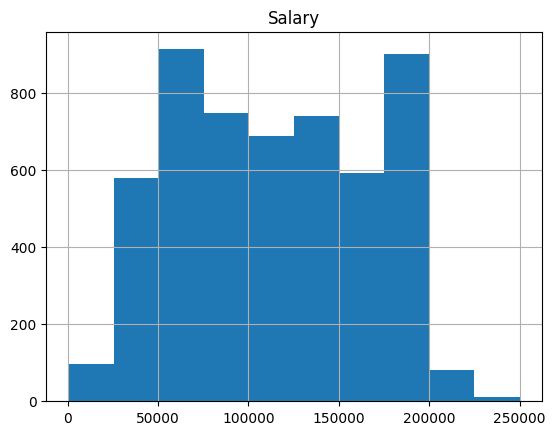

In [8]:
df_y_train_skills.hist()

TEST

In [9]:
df_x_test_skills = pd.read_csv(X_TEST_PATH)
df_x_test_skills = df_x_test_skills[['Age', 'Gender', 'Education Level','Job Title', 'Years of Experience', 'Country', 'Race', 'height','weight', 'id', 'professionalism']]
df_x_test_skills.set_index('id',drop=True,inplace=True)
df_x_test_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 6480 to 2506
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1341 non-null   float64
 1   Gender               1341 non-null   object 
 2   Education Level      1341 non-null   object 
 3   Job Title            1341 non-null   object 
 4   Years of Experience  1341 non-null   float64
 5   Country              1341 non-null   object 
 6   Race                 1341 non-null   object 
 7   height               1341 non-null   float64
 8   weight               1341 non-null   float64
 9   professionalism      1341 non-null   float64
dtypes: float64(5), object(5)
memory usage: 115.2+ KB


# IMPUTE

In [10]:
def impute_missing_values(df_train, df_test , remove_row_missing_cat_data):
  imputer_dict = {}
  if remove_row_missing_cat_data:
    for col in df_train.columns:
        if df_train[col].dtype != 'object': #number
          imp = SimpleImputer(strategy='mean')
          df_train[col] = imp.fit_transform(df_train[col].values.reshape(-1, 1))
          df_test[col] = imp.transform(df_test[col].values.reshape(-1, 1))
          imputer_dict[col] = imp
        else: #cat col
            df_train.dropna(subset=[col], inplace=True) #remove rows with miss in categorical col
            df_test
  else:
    for col in df_train.columns:
        if df_train[col].dtype == 'object':
          imp = SimpleImputer(strategy='most_frequent')

        else:
          imp = SimpleImputer(strategy='mean')
        df_train[col] = imp.fit_transform(df_train[col].values.reshape(-1, 1))
        df_test[col] = imp.transform(df_test[col].values.reshape(-1, 1))
        imputer_dict[col] = imp
  return df_train , df_test,imputer_dict

# One hot encode
encode on train , use on test, ignore unknown category

In [11]:
def one_hot_encode(df_train, df_test):

  cat_col = list(df_train.select_dtypes(include=['object']).columns)
  encoder = OneHotEncoder(handle_unknown='ignore')

  encoded_data = encoder.fit_transform(df_train[cat_col])
  encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cat_col),index=df_train.index)
  df_train.drop(cat_col,axis = 1, inplace=True) #drop the original cat col
  final_df_train = pd.concat([df_train, encoded_df], axis=1)

  encoded_test_data = encoder.transform(df_test[cat_col])
  encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out(cat_col),index=df_test.index)
  df_test.drop(cat_col,axis = 1, inplace=True) #drop the original cat col
  final_df_test = pd.concat([df_test, encoded_test_df], axis=1)


  return final_df_train ,final_df_test

In [12]:
def scale_data(df_train, df_test):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_x_train_skills_copy_encode)
    train_scaled_df = pd.DataFrame(scaled_data, columns=df_x_train_skills_copy_encode.columns)
    test_scaled_data = scaler.transform(df_x_test_skills_copy_encode)
    test_scaled_df = pd.DataFrame(test_scaled_data, columns=df_x_test_skills_copy_encode.columns)
    return train_scaled_df,test_scaled_df

In [13]:

#df_x_train_skills_copy_encode,df_x_test_skills_copy_encode



In [14]:
test_scaled_df

NameError: ignored

# PREPROCESS
- remove train Nan
- impute
- encode
- scale

In [15]:
#remove nan values  from train
na_filter = df_y_train_skills['Salary'].notna()
df_y_train_skills = df_y_train_skills[na_filter]
df_x_train_skills = df_x_train_skills[na_filter]


#IMPUTE
df_x_train_skills_copy = df_x_train_skills.copy()
df_x_test_skills_copy = df_x_test_skills.copy()
df_x_train_skills_copy,df_x_test_skills_copy, imputer_dict = impute_missing_values(df_x_train_skills_copy,df_x_test_skills_copy,False)

#ENCODE
df_x_train_skills_copy_encode,df_x_test_skills_copy_encode = one_hot_encode(df_x_train_skills_copy,df_x_test_skills_copy)
#df_x_test_skills_copy_encode = one_hot_encode()

#scale
df_x_train_skills_copy_encode,df_x_test_skills_copy_encode = scale_data(df_x_train_skills_copy_encode, df_x_test_skills_copy_encode)

In [16]:
df_x_train_skills_copy_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Columns: 205 entries, Age to Race_White
dtypes: float64(205)
memory usage: 8.4 MB


In [14]:
df_x_test_skills_copy_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 6480 to 2506
Columns: 205 entries, Age to Race_White
dtypes: float64(205)
memory usage: 2.1 MB


# TRAIN

In [17]:
def knn_train(df_x_train, series_y_train,v_n_neighbors):
  knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
  knn.fit(df_x_train, series_y_train)
  return knn

In [18]:
def decision_tree_train(df_x_train,series_y_train,c,s):
  decision_tree = DecisionTreeRegressor(random_state=0,criterion=c,min_samples_split=s)
  decision_tree.fit(df_x_train,series_y_train)
  return decision_tree

In [19]:
def lin_reg_train(df_x_train,series_y_train,f):
  lin_reg_model = LinearRegression(fit_intercept=f)
  lin_reg_model.fit(df_x_train,series_y_train)
  return lin_reg_model

# run train and validate
- took 10% from train for validation of the models
- did my own simple grid search

In [32]:
train_x, val_x,train_y, val_y = train_test_split(df_x_train_skills_copy_encode,df_y_train_skills, test_size=0.1)

save results here

In [36]:
results_dict = {"model":[],
                "model_name":[],
                "model_config":[],
                "rmse_val":[]}

## knn search space on K

In [35]:
knn_values = range(3,11,2)
rmse_val_arr = []
for knn_val in knn_values:
  knn_model = knn_train(train_x, train_y['Salary'],v_n_neighbors=knn_val)
  knn_model_name = f'knn_{knn_val}'

  y_pred = knn_model.predict(val_x)
  y_true = val_y['Salary']
  rmse_val = mean_squared_error(y_true, y_pred, squared=False)
  rmse_val_arr.append(rmse_val)

  #save results
  results_dict['model'].append(knn_model)
  results_dict['model_name'].append('KNN')
  results_dict['model_config'].append(knn_model_name)

results_dict['rmse_val']+=rmse_val_arr
#results_dict['rmse_test']+=list(np.zeros_like(rmse_val_arr,dtype=np.int32))
results_dict

{'model': [KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(),
  KNeighborsClassifier(n_neighbors=7),
  KNeighborsClassifier(n_neighbors=9),
  KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(),
  KNeighborsClassifier(n_neighbors=7),
  KNeighborsClassifier(n_neighbors=9)],
 'model_name': ['KNN', 'KNN', 'KNN', 'KNN', 'KNN', 'KNN', 'KNN', 'KNN'],
 'model_config': ['knn_3',
  'knn_5',
  'knn_7',
  'knn_9',
  'knn_3',
  'knn_5',
  'knn_7',
  'knn_9'],
 'rmse_val': [33603.59612771455,
  34863.354026266905,
  34020.887623245624,
  33275.11913698017,
  33603.59612771455,
  34863.354026266905,
  34020.887623245624,
  33275.11913698017]}

## DecisionTreeRegressor

In [37]:
criterions = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
min_samples_splitint = range(2,10,2)
rmse_val_arr = []

for c in criterions:
    for s in min_samples_splitint:
        tree_model = decision_tree_train(train_x, train_y['Salary'],c, s)
        tree_model_name = f'dt_{c}_{s}'

        y_pred = tree_model.predict(val_x)
        y_true = val_y['Salary']
        rmse_val = mean_squared_error(y_true, y_pred, squared=False)
        rmse_val_arr.append(rmse_val)

        #save results
        results_dict['model'].append(tree_model)
        results_dict['model_name'].append('DecisionTree')
        results_dict['model_config'].append(tree_model_name)
        #results_dict['rmse_val'].append(rmse_val)

results_dict['rmse_val']+=rmse_val_arr
#results_dict['rmse_test']+=list(np.zeros_like(rmse_val_arr,dtype=np.int32))


## Linear reg

In [38]:
rmse_val_arr = []
fit_intercept = [True,False]
normalize = [True,False]

for f in fit_intercept:
    linreg_model = lin_reg_train(train_x, train_y['Salary'],f)
    linreg_model_name = f'linreg_{c}_{s}'

    y_pred = tree_model.predict(val_x)
    y_true = val_y['Salary']
    rmse_val = mean_squared_error(y_true, y_pred, squared=False)
    rmse_val_arr.append(rmse_val)

    #save results
    results_dict['model'].append(linreg_model)
    results_dict['model_name'].append('LinReg')
    results_dict['model_config'].append(linreg_model_name)
    #results_dict['rmse_val'].append(rmse_val)

results_dict['rmse_val']+=rmse_val_arr
#results_dict['rmse_test']+=list(np.zeros_like(rmse_val_arr,dtype=np.int32))


## validation results
in order to check our models on 10% of the data

In [39]:
df_results = pd.DataFrame(results_dict)
df_results.sort_values(by='rmse_val', ascending=True)

,model,model_name,model_config,rmse_val
3,"DecisionTreeRegressor(min_samples_split=8, ran...",DecisionTree,dt_squared_error_8,12030.556478
7,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_8,12030.556478
2,"DecisionTreeRegressor(min_samples_split=6, ran...",DecisionTree,dt_squared_error_6,12272.666221
6,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_6,12272.666221
0,DecisionTreeRegressor(random_state=0),DecisionTree,dt_squared_error_2,12406.648839
4,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_2,12406.648839
1,"DecisionTreeRegressor(min_samples_split=4, ran...",DecisionTree,dt_squared_error_4,12708.503583
5,DecisionTreeRegressor(criterion='friedman_mse'...,DecisionTree,dt_friedman_mse_4,12708.503583
9,DecisionTreeRegressor(criterion='absolute_erro...,DecisionTree,dt_absolute_error_4,13461.418225
12,"DecisionTreeRegressor(criterion='poisson', ran...",DecisionTree,dt_poisson_2,13534.204911


plot each type of model

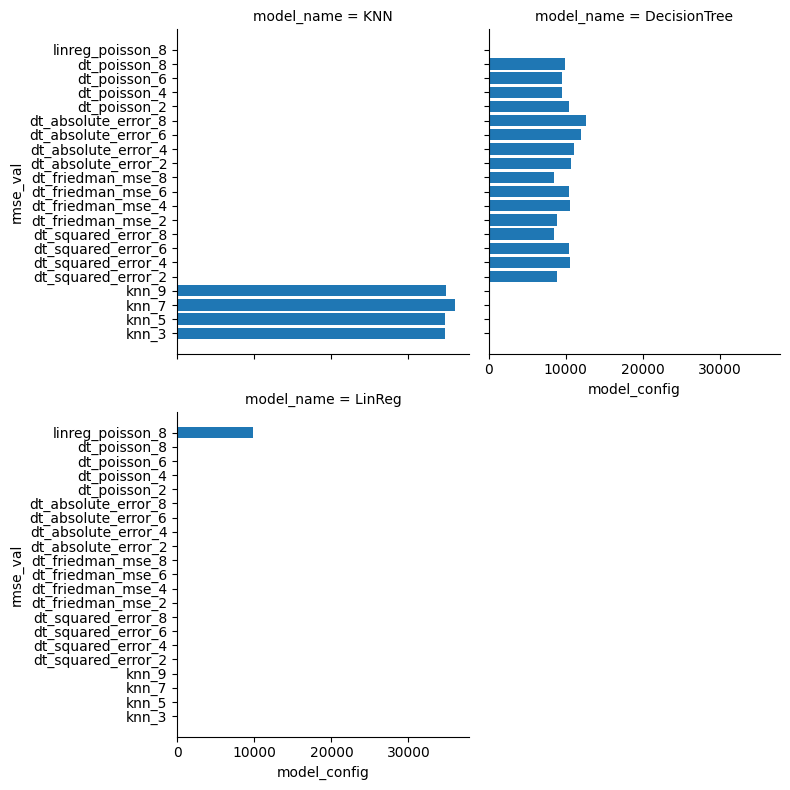

In [30]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_results, col="model_name", height=4,col_wrap=2)
g.map(plt.barh, "model_config", "rmse_val")


top 10 best models


In [65]:
min_rmse = df_results['rmse_val'].min()
best_model = df_results.loc[(df_results['rmse_val'] == min_rmse), 'model'].iloc[0]
print(f'bset model was: {best_model} with params:')
print(best_model.get_params())

bset model was: DecisionTreeRegressor(min_samples_split=8, random_state=0) with params:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


<Axes: xlabel='rmse_val', ylabel='model_config'>

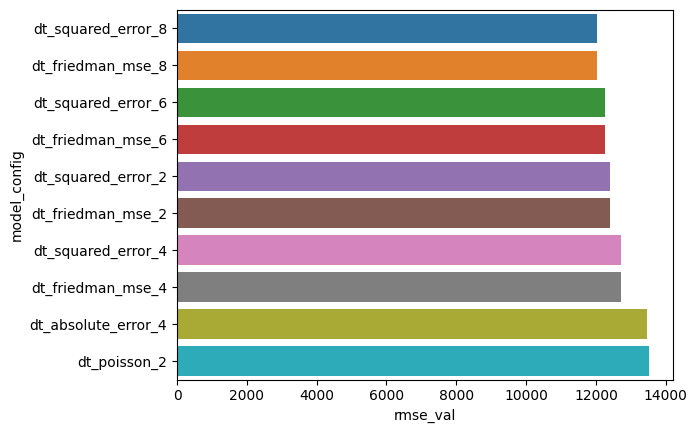

In [46]:
sns.barplot(data= df_results.sort_values(by='rmse_val', ascending=True)[:10] , y='model_config',x='rmse_val',orient = 'h');

# Run on test set
1. take the best model (had lowest rmse value on validation)
2. train it on all train set
3. write test dic

In [27]:
min_rmse = df_results['rmse_val'].min()
best_model = df_results.loc[(df_results['rmse_val'] == min_rmse), 'model'].iloc[0]
best_model

DecisionTreeRegressor(min_samples_split=8, random_state=0)

train on entire train set

In [71]:
best_model.fit(df_x_train_skills_copy_encode,df_y_train_skills['Salary'])

DecisionTreeRegressor(min_samples_split=8, random_state=0)

recheck on validation set

In [72]:
val_y_pred = best_model.predict(val_x)
rmse_val = mean_squared_error(val_y, val_y_pred, squared=False)
rmse_val

2702.6041467765644

predict on test

In [73]:
dict_test = {"id":[],'salary':[]}
y_pred = best_model.predict(df_x_test_skills_copy_encode)

In [74]:
dict_test["id"] = list(df_x_test_skills_copy_encode.index)
dict_test["salary"] = y_pred
pd.DataFrame(dict_test)

,id,salary
0,0,150666.666667
1,1,55000.000000
2,2,80247.000000
3,3,195000.000000
4,4,72500.000000
...,...,...
1336,1336,180000.000000
1337,1337,156666.666667
1338,1338,120000.000000
1339,1339,135000.000000


In [75]:
df_x_test_skills_copy_encode

,Age,Years of Experience,height,weight,professionalism,Gender_F,Gender_M,Gender_O,Education Level_bachelor,Education Level_bachelor's|degr,...,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_NayaCollegegeek,Race_Welsh,Race_White
0,0.595238,0.126050,0.318130,0.400002,0.330882,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,0.025210,0.062578,0.247494,0.039706,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.166667,0.033613,0.559311,0.177761,0.052941,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.428571,0.117647,0.983016,0.407232,0.260784,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.166667,0.042017,0.139552,0.157415,0.054902,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,0.523810,0.117647,0.962007,0.398502,0.288235,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1337,0.500000,0.126050,0.708280,0.377725,0.301471,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1338,0.452381,0.092437,0.254923,0.368173,0.210294,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1339,0.357143,0.075630,0.828214,0.308738,0.141176,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
dict_test = {"id":[],'salary':[]}
y_pred = best_model.predict(df_x_test_skills_copy_encode)
dict_test["id"] = list(df_x_test_skills_copy_encode.index)
dict_test["salary"] = y_pred
pd.DataFrame(dict_test)

,id,salary
0,0,150666.666667
1,1,55000.000000
2,2,80247.000000
3,3,195000.000000
4,4,72500.000000
...,...,...
1336,1336,180000.000000
1337,1337,156666.666667
1338,1338,120000.000000
1339,1339,135000.000000


# **Final result** dictionary

In [85]:
#{"1":"SALARY"..}
x_test_ids = list(df_x_test_skills_copy_encode.index)
dict_test = {x_test_id: y_test_pred for x_test_id,y_test_pred in zip(x_test_ids,y_pred.tolist())}

In [ ]:
y_pred

In [86]:
import json
with open("/content/results.txt", "w") as fp:
    json.dump(dict_test, fp)  # encode dict into JSON
print("Done writing dict into .txt file")

Done writing dict into .txt file
